In [46]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats

import cvxpy as cp
import numpy as np

import pandas as pd

matplotlib.rcParams.update({'font.size': 20})

# Sklearn

In [85]:
def sklearn_L1_reg(x, y, report=False):
    x = np.array(x).reshape([-1, 1])
    fit = linear_model.Lasso(alpha=1.)
    fit.fit(x, y)
    r_sq = fit.score(x, y)
    y_pred = fit.predict(x)
    if report:
        print('coefficient of determination:', r_sq)
        print('slope:', fit.coef_[0])
        print('intercept:', fit.intercept_)
    return fit, y_pred


def scipy_L2_reg(x, y, report=False):
    fit = stats.linregress(x, y)
    y_pred = fit.intercept + fit.slope * x
    if report:
        print('slope:', fit.slope)
        print('intercept:', fit.intercept)
    return fit, y_pred


def cvxpy_reg(x, y, p=1, report=False):
    # Define and solve the CVXPY problem.
    A = np.vstack([x, np.ones(len(x))]).T
    m = cp.Variable(2)          # 2 parameter space (slope & intercept)
    cost = cp.norm(A@m-y, p=p)  # L1 norm cost function
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve()
    y_pred = A @ m.value
    if report:
        print("The optimal value is", prob.value)
        print("The optimal model is")
        print(m.value)
        print("The L{} norm of the residual = {} ".format(p, cp.norm(A@m-y, p=p).value))
    return prob, y_pred

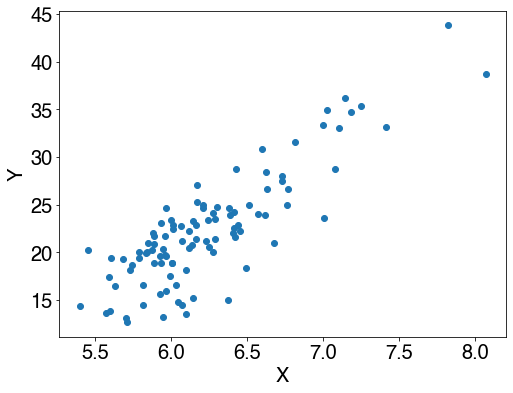

In [86]:
m = 100
n = 2
np.random.seed(1)


# (1) Create a naive dataset
A = np.vstack([np.arange(m), np.ones(m)]).T
x = [3.5, 4]
noise = np.random.randn(m) * 10.
b = A @ x + noise
id1 = 80
id2 = id1 + 10
b[id1:id2] = b[id1:id2] - 100


# (2) Loading a dataset
URL = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
df = pd.read_csv(URL, header=None)
# selecting a single feature and 100 instances for simplicity
X = np.array(df.loc[:100, 5])
b = np.array(df.loc[:100, 13]) # target label 
A = np.vstack([X, np.ones(len(X))]).T


# Plot the dataset
plt.figure(figsize=[8,6])
plt.scatter(A[:,0], b)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



Sklearn Lasso regression
coefficient of determination: 0.5979386056450765
slope: 6.034256379283896
intercept: -15.28906211901559


Scipy L2 least squares
slope: 10.226601736627838
intercept: -41.446308546210815


CVXPY least squares
The optimal value is 250.58257575792865
The optimal model is
[  9.84848484 -38.77196967]
The L1 norm of the residual = 250.58257575792865 


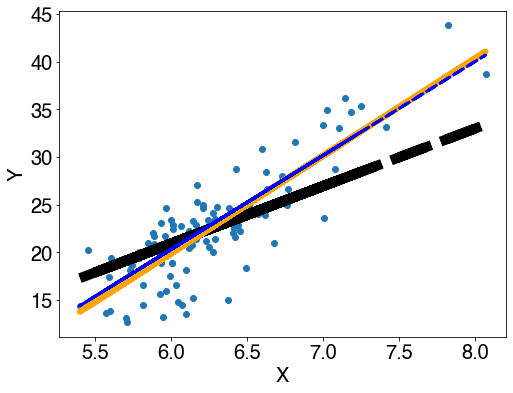

In [87]:
print('\n\nSklearn Lasso regression')
y_pred1  = sklearn_L1_reg(A[:,0], b, report=True)[1]

print('\n\nScipy L2 least squares')
y_pred2  = scipy_L2_reg(A[:,0], b, report=True)[1]

print('\n\nCVXPY least squares')
prob, y_pred3  = cvxpy_reg(A[:,0], b, p=1, report=True)

plt.figure(figsize=[8,6])
plt.plot(A[:,0], y_pred1, '--k'   , lw=10)
plt.plot(A[:,0], y_pred2, 'orange', lw=6)
plt.plot(A[:,0], y_pred3, '--b'   , lw=3)
plt.scatter(A[:,0], b)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()